# Esercitazione 5  
## DFT (seconda parte)

### Sommario

L’esercitazione è finalizzata all’analisi e alla rappresentazione di segnali nel dominio della frequenza. Nella prima parte, si considera un segnale composto da una somma di sinusoidi, del quale si analizzano le caratteristiche temporali e spettrali mediante la Trasformata Discreta di Fourier (DFT). Successivamente, si esplora il concetto di proiezione di un segnale su una base di sinusoidi complesse, studiando l’effetto della riduzione della dimensione della base sulla qualità della ricostruzione del segnale. Infine, si analizzano segnali sinusoidali concatenati con porzioni di silenzio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.io as sio
import scipy.fft as fft

#### Esercizio 1  

**(a)** Leggere il file `frequencyRepresentation.mat` usando:
```python
x = np.squeeze(sio.loadmat('frequencyRepresentation.mat')['x'])
```

**(b)** Plot dei primi 500 campioni di `x`.

**(c)** Salvare `x` come audio WAV a 8000 Hz:
```python
scipy.io.wavfile.write('sound1.wav', 8000, x)
```

**(d)** Calcolare la DFT di `x` e plot del suo modulo.  
*Domanda:* In quale dei tre modi (time plot, ascolto, spettro) è più chiaro il numero di sinusoidi presenti?

Esercizio 1
Dimensione del segnale: (4000,)


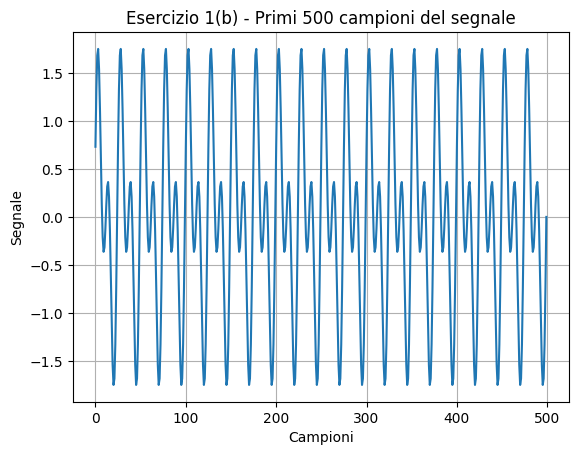

Audio salvato come 'sound1.wav' (frequenza di campionamento: 8000 Hz)


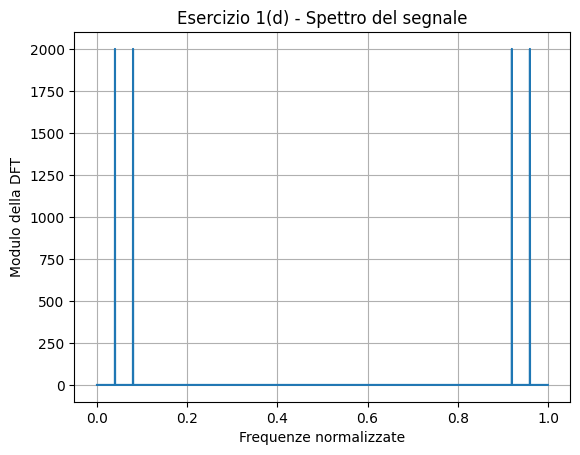

❓ In quale dominio il numero di sinusoidi è più facilmente individuabile?
- Time domain: difficile, le sinusoidi si sovrappongono
- Audio: possibile intuire il numero di toni, ma non è chiaro
- Spettro (DFT): ✅ più chiaro, ogni sinusoide appare come un picco netto


In [3]:
# -------------------------------------------
# Esercizio 1 - Analisi in frequenza di un segnale audio
# -------------------------------------------

print("Esercizio 1")

### -------------------------------
### (a) Lettura del segnale
### -------------------------------
# Il file contiene un array "x" da estrarre come vettore 1D
x = np.squeeze(sio.loadmat('frequencyRepresentation.mat')['x'])
print(f"Dimensione del segnale: {x.shape}")

### -------------------------------
### (b) Plot dei primi 500 campioni
### -------------------------------
plt.figure()
plt.plot(x[:500])
plt.xlabel("Campioni")
plt.ylabel("Segnale")
plt.title("Esercizio 1(b) - Primi 500 campioni del segnale")
plt.grid(True)
plt.show()

### -------------------------------
### (c) Salvataggio del segnale audio a 8000 Hz
### -------------------------------
scipy.io.wavfile.write('sound1.wav', 8000, x)
print("Audio salvato come 'sound1.wav' (frequenza di campionamento: 8000 Hz)")

### -------------------------------
### (d) Calcolo DFT e modulo
### -------------------------------
X = fft.fft(x)
frequenze_normalizzate = np.arange(len(x)) / len(x)

plt.figure()
plt.plot(frequenze_normalizzate, np.abs(X))
plt.xlabel("Frequenze normalizzate")
plt.ylabel("Modulo della DFT")
plt.title("Esercizio 1(d) - Spettro del segnale")
plt.grid(True)
plt.show()

# -------------------------------
# Domanda di riflessione:
# -------------------------------
print("❓ In quale dominio il numero di sinusoidi è più facilmente individuabile?")
print("- Time domain: difficile, le sinusoidi si sovrappongono")
print("- Audio: possibile intuire il numero di toni, ma non è chiaro")
print("- Spettro (DFT): ✅ più chiaro, ogni sinusoide appare come un picco netto")


#### Esercizio 2  

**(a)** Considerare il segnale `y` di lunghezza 128 in cui la prima metà vale 1 e la seconda metà 0, e plot di `y`.  
**(b)** Calcolare la DFT di `y`.  
**(c)** Costruire i vettori `Y^(k)` di lunghezza 128 con i primi k+1 coefficienti DFT non azzerati (k=0,…,9) e inversa.  
Plot di tutte le ricostruzioni in un’unica figura.

Esercizio 2


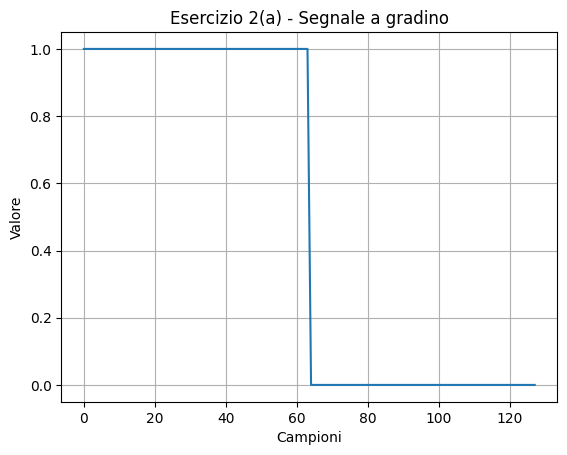

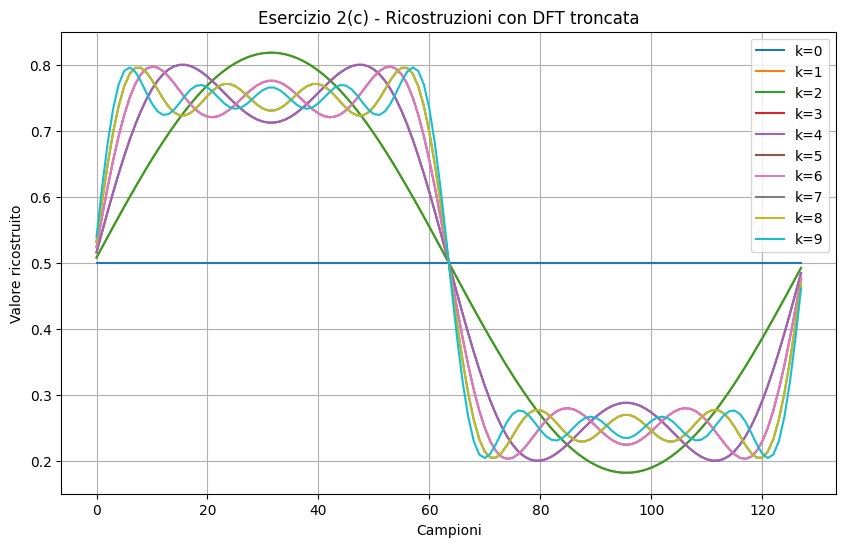

In [4]:
# ----------------------------------------
# Esercizio 2 - Ricostruzione da DFT troncata
# ----------------------------------------

print("Esercizio 2")

### -------------------------------
### (a) Creazione del segnale y
### -------------------------------
# Segnale di lunghezza 128: primi 64 elementi a 1, resto 0
y = np.zeros(128)
y[:64] = 1

plt.figure()
plt.plot(np.arange(128), y)
plt.title("Esercizio 2(a) - Segnale a gradino")
plt.xlabel("Campioni")
plt.ylabel("Valore")
plt.grid(True)
plt.show()

### -------------------------------
### (b) Calcolo della DFT del segnale y
### -------------------------------
Y = fft.fft(y)

### -------------------------------
### (c) Ricostruzione da DFT troncata
### -------------------------------
# Preparazione per ricostruzione con coefficienti DFT parziali
num_el = 10  # Valori di k da 0 a 9
plt.figure(figsize=(10, 6))

for k in range(num_el):
    # Vettore troncato: manteniamo solo i primi k+1 coefficienti
    Y_trunc = np.zeros_like(Y, dtype=complex)
    Y_trunc[:k+1] = Y[:k+1]

    # Ricostruzione tramite IDFT
    y_approx = fft.ifft(Y_trunc)
    y_approx_real = np.real(y_approx)

    # Plot della ricostruzione
    plt.plot(y_approx_real, label=f'k={k}')

plt.title("Esercizio 2(c) - Ricostruzioni con DFT troncata")
plt.xlabel("Campioni")
plt.ylabel("Valore ricostruito")
plt.legend()
plt.grid(True)
plt.show()


#### Esercizio 3  

**(a)** Definire i segnali di lunghezza N=1000:
- `z1[n] = sin(80π n / N)`
- `z2[n] = sin(160π n / N)`
- `z3[n] = sin(320π n / N)`
dove `n = 0, …, 999`.

**(b)** Concatenare in `z` i tre segnali con 1000 zeri di silenzio tra di essi (lunghezza totale 5000).  
Salvare come WAV (fs=5000) e ascoltare.

**(c)** Calcolare la DFT di `z` e plot del suo modulo.

**(d)** Definire `Zapprox` tagliando a zero tutti i coefficienti di `Z` tranne i primi 600 e gli ultimi 600, fare plot del modulo, inversa, salvare (fs=5000) e confrontare audio.

Esercizio 3
✅ Segnale originale salvato come 'sound2.wav'


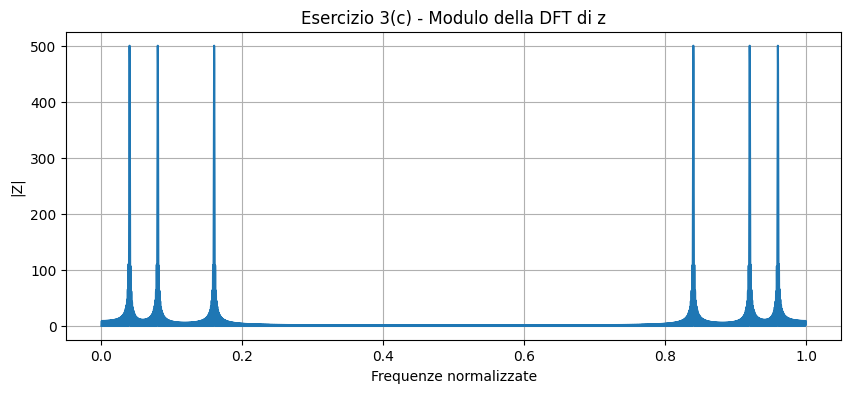

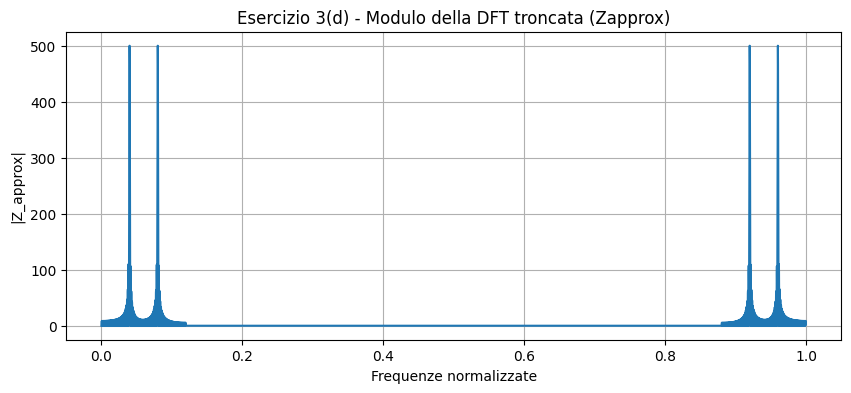

✅ Segnale ricostruito salvato come 'sound3.wav'


In [5]:
# ----------------------------------------
# Esercizio 3 - Segmenti sinusoidali e filtraggio in frequenza
# ----------------------------------------

print("Esercizio 3")

### -------------------------------
### (a) Definizione dei segnali sinusoidali
### -------------------------------

N = 1000
t = np.arange(N)

# Tre sinusoidi a diverse frequenze
z1 = np.sin(80 * np.pi * t / N)
z2 = np.sin(160 * np.pi * t / N)
z3 = np.sin(320 * np.pi * t / N)

### -------------------------------
### (b) Concatenazione con silenzio
### -------------------------------

# Creiamo un segnale z di lunghezza 5000 con zeri tra i segmenti
z = np.zeros(5000)
z[0:1000]     = z1
z[2000:3000]  = z2
z[4000:5000]  = z3

# Salvataggio come file audio (frequenza campionamento 5000 Hz)
scipy.io.wavfile.write('sound2.wav', 5000, z)
print("✅ Segnale originale salvato come 'sound2.wav'")

### -------------------------------
### (c) Calcolo della DFT e visualizzazione
### -------------------------------

Z = fft.fft(z)
frequenze_normalizzate = np.arange(len(Z)) / len(Z)

plt.figure(figsize=(10, 4))
plt.plot(frequenze_normalizzate, np.abs(Z))
plt.xlabel("Frequenze normalizzate")
plt.ylabel("|Z|")
plt.title("Esercizio 3(c) - Modulo della DFT di z")
plt.grid(True)
plt.show()

### -------------------------------
### (d) Approssimazione filtrando in frequenza
### -------------------------------

Z_approx = np.copy(Z)

# Azzeriamo tutti i coefficienti tranne primi 600 e ultimi 600
Z_approx[600:-600] = 0

# Visualizzazione spettro filtrato
plt.figure(figsize=(10, 4))
plt.plot(frequenze_normalizzate, np.abs(Z_approx))
plt.xlabel("Frequenze normalizzate")
plt.ylabel("|Z_approx|")
plt.title("Esercizio 3(d) - Modulo della DFT troncata (Zapprox)")
plt.grid(True)
plt.show()

# Ricostruzione tramite IDFT
z_approx = np.real(fft.ifft(Z_approx))

# Salvataggio del segnale ricostruito
scipy.io.wavfile.write('sound3.wav', 5000, z_approx)
print("✅ Segnale ricostruito salvato come 'sound3.wav'")
